In [320]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [321]:
Operators = ["+", '-', '*', '/',"^", "sin" , "cos"]
Values = [0 , 1, 2, 3, 4, 5, 6, 7, 8, 9 , "x"]
variable = ['x']
First_population = 50
Best_choise_num = 5
Other_choise_num = 2
Iteration = 100
Mutation_rate = 0 #From 100%
Mutation_count = 0 #Per gen
Max_tree_depth = 5
copy_Mutation_rate = 10
copy_Mutation_count = 2

In [322]:
def function(x):
    # return 2 * (x**2) + 3 * x + 1
    return 5*x

In [323]:
X_train = np.random.randint(1, 1000, size=(100, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train


array([2850, 4920, 1725, 4985, 4695, 2245, 3400, 1840, 4555, 1000, 1275,
        250,  695,  170, 3225, 3710, 2745,  485, 2295, 3585, 2420, 3460,
       4955, 3610, 4940, 2375, 1770, 4215,  365, 3835, 2025, 2245, 1325,
       1280,  995, 1815, 2005, 2650, 2770, 1880, 3105, 2325, 1785, 3410,
        460, 1210, 2425, 3290, 3370,  405, 3115, 2580, 4305, 2445, 3070,
        760, 4980, 4405, 4075, 4375,  540, 3245, 2965,  115,  940, 1100,
       1895, 1785, 2465,  995, 1745,  195,  960, 4835,  440, 4610, 2790,
       2660, 4185, 3055, 2855,  440, 2420, 3775, 1670, 4660, 4420, 1000,
       4325, 4690,  455, 2820, 1735, 2120, 2855, 2035, 4525, 3085,  155,
       3820])

In [324]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [325]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()
    
    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))
        

    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                child = random.choice(Values)
                temp_node = Node (operator=temp_op, children=[child])
                temp_node.isLeaf = True
                return temp_node
            else :
                child1 = random.choice(Values)
                child2 = random.choice(Values)
                temp_node = Node (operator= temp_op , children=[child1,child2])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    if (node.children[0] == "x"):
                        node.value = self.SinCosOp (node , val)

                    else :
                        node.value = self.SinCosOp (node , node.children[0])
                    # return node.value
                else :
                    if (node.children[0] == "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , val , val)
                    elif (node.children[0] == "x" and node.children[1] != "x"):
                        node.value = self.OtherOp (node , val , node.children[1])
                    elif (node.children[0] != "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , node.children[0], val)
                    else:
                        node.value = self.OtherOp (node , node.children[0] , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp(self, node, val1, val2, flag=False):
        if flag:
            return

        if node.operator == "+":
            result = val1 + val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "-":
            result = val1 - val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "*":
            result = val1 * val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "/":
            if val2 == 0:
                flag = True
                return 1
            # Convert val1 and val2 to float to avoid overflow errors
            result = float(val1) / float(val2)
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "^":
            if val1 == 0 and val2 < 0:
                return 1
            else:
                if val2 == 0:
                    return 1
                x = 1
                i = 1
                while not flag and i <= val2:
                    x = x * val1
                    i += 1
                    if x > 10000 or x < -10000:
                        flag = True
                        return 10000
                return x



    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node


In [326]:
def Create_tree ():
    my_tree = Tree(random.randint(1 , Max_tree_depth))
    my_tree.create()
    return my_tree


In [327]:
treeList = []
for i in range (First_population):
    treeList.append(Create_tree())
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

cos(sin(((cos(3) - cos(9)) * (5 - 3))))
((4 - 2) - cos(4))
((((8 * 3) + sin(9)) / (0 + 7)) ^ sin(2))
((5 - 9) - (7 ^ 3))
(sin(cos((((6 + 3) - (4 + x)) - ((x - 2) ^ sin(1))))) * cos(3))
(cos(((x + x) - (1 - 1))) / cos(cos((((2 ^ 0) * (7 / 4)) + (7 ^ 1)))))
((cos(7) + sin(4)) / ((((5 * x) ^ (6 ^ 8)) ^ ((7 * 1) - (4 ^ 0))) ^ (((1 - 2) - cos(2)) + ((3 * 7) + (x * 2)))))
(cos(x) - (2 / 8))
sin(x)
(cos((5 * 2)) * (2 / 2))
(sin((0 + 0)) + (cos(((9 ^ 1) / (7 / 3))) ^ ((sin(3) ^ cos(0)) / cos((5 - 8)))))
((sin((4 + 5)) + sin((3 ^ x))) / (((0 + 2) + sin(2)) + ((0 + 7) / (9 - 9))))
(sin((9 - 5)) - cos(7))
(sin(cos(cos((4 / 5)))) + (5 / 2))
((((5 * 3) ^ cos(x)) + cos(2)) + cos(1))
((2 / 8) ^ cos(cos(0)))
sin((5 / 6))
((2 - 6) ^ cos(1))
(8 ^ 8)
(7 * 7)
sin((((sin(4) + (x - 5)) - cos((8 / 9))) - cos(((8 ^ 9) / (7 + 1)))))
((((9 / x) / (7 * 4)) / (2 - 6)) * ((5 + 2) / (1 ^ 5)))
(2 ^ 8)
cos((8 ^ 3))
sin((cos(2) * (0 * x)))
cos((5 - 4))
(sin(((((9 - 3) * (2 + 5)) / (cos(4) + (4 / 5))) * sin(2))) * (3 +

In [328]:
avg = []
n = 0
for i in range (Iteration):

    bestTrees = []
    otherTrees = []

    #Find the best MSEs
    bestTreesIndex = mseTree.argsort()[:Best_choise_num]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]
    
    #Create new gen from best trees and others
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])
    for j in range (len(other_idx)):
        otherTrees.append(treeList[other_idx[j]])
    random_elements = random.sample(otherTrees, Other_choise_num)
    for element in random_elements :
         bestTrees.append(element)

    # Mutation
    # if (len(avg) > 10):
    #     if (all(avg[-5] == item for item in avg[-4:]) and avg[-1] > 10):
    #         Mutation_rate *= 2
    #         Mutation_count *=2
    #     elif (all(avg[-10] == item for item in avg[-9:] ) and avg[-1] > 10) :
    #         Mutation_rate *= 5
    #         Mutation_count *= 5
    #     else :
    #         Mutation_rate = copy_Mutation_rate
    #         Mutation_count = copy_Mutation_count

    if (len(avg) > 2):
        if (avg[-1] == avg[-2] and avg[-1]>10):
            n +=1
            Mutation_rate = copy_Mutation_rate * n
            Mutation_count = copy_Mutation_count * n
        elif ( avg[-1]<1):
            n=0
            Mutation_rate = 0
            Mutation_count = 0
        else :
            n=0
            Mutation_rate = copy_Mutation_rate
            Mutation_count = copy_Mutation_count


    tempRate = random.randint(0,100)
    if (tempRate <= Mutation_rate):
        for j in range (Mutation_count):
            tempTree = Create_tree()
            bestTrees.append(tempTree)
            print ("!!!!!!!!")
            print (i)
            tempTree.printTree()



    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):

            temp1 = copy.deepcopy(bestTrees[j])
            temp2 = copy.deepcopy(bestTrees[k])

            nodes1= temp1.TreeToList()
            nodes2 = temp2.TreeToList()

            select1 = random.choice (nodes1)
            select2 = random.choice (nodes2)

            # print ("Before change")
            # temp1.printTree()
            # temp2.printTree()

            # print ("Selected Nodes:")
            # temp1.printTree(select1)
            # temp2.printTree(select2)

            temp1.ReplaceNode (select1 , select2)
            temp2.ReplaceNode (select2 , select1)

            # print ("After change")
            # temp1.printTree()
            # temp2.printTree()

            treeList.append(temp1)
            treeList.append(temp2)
            
            # print ("Child created!")
            # print ("-----------------------------------------------------------")


    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:Best_choise_num]
    # avg.append(mean (lowest_five))
    avg.append(round((sum(lowest_five) / len(lowest_five)) , 2))
    mseTree = np.array(mseTree)
    # print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:Best_choise_num]
bestTreesIndex = mseTree.argsort()[:Best_choise_num]
print ("------------------------------------------")
for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

# print ("------------------------------------------")
# print (mseTree)

# np.array(avg)
avg


!!!!!!!!
7
(5 ^ 1)
!!!!!!!!
7
((1 * 3) ^ sin(8))
!!!!!!!!
17
((5 * 0) ^ cos(0))
!!!!!!!!
17
sin((((5 ^ 8) ^ (((8 + 7) / (4 * 2)) * ((9 * 7) + (9 ^ 5)))) / (sin((cos(0) * sin(4))) ^ sin((0 - 5)))))
!!!!!!!!
40
(((cos(9) * ((x + 9) + (x / 4))) / sin(7)) ^ (((sin(7) ^ (5 * 7)) ^ cos(1)) * ((sin(4) * (1 + 6)) / sin(cos(4)))))
!!!!!!!!
40
(8 * 7)
!!!!!!!!
59
((cos((((1 - x) + (x ^ 8)) / ((9 ^ 5) ^ (0 * 4)))) - ((8 + 1) - ((3 * 6) * cos((9 - 7))))) * (cos((cos(5) / cos(9))) * (sin(cos(2)) - (cos(cos(6)) ^ (7 - 7)))))
!!!!!!!!
59
sin(cos(((0 ^ 6) / (6 / 6))))
!!!!!!!!
62
((sin(8) / (sin(cos((0 - 2))) + (9 / 2))) + ((0 - 0) ^ (7 / 6)))
!!!!!!!!
62
(5 + 3)
!!!!!!!!
88
(x * 2)
!!!!!!!!
88
((((x ^ 2) * cos((0 * 9))) + ((8 / x) - (cos(9) * cos(9)))) - ((x * 6) - (x - 4)))
!!!!!!!!
89
((7 + 3) + sin(cos(5)))
!!!!!!!!
89
(((cos(3) * (9 + 4)) - ((((x * 5) ^ cos(8)) - (5 - 3)) + (((4 * x) ^ (x * 3)) ^ (cos(6) + (4 ^ 5))))) - (sin((((8 - 4) + (4 + 1)) / cos(sin(6)))) + ((((1 * 0) + (2 ^ 4)) ^ (8 + 9)) 

[2437677.08,
 775189.61,
 347505.31,
 347505.31,
 338465.04,
 329424.76,
 320384.49,
 311344.21,
 302303.94,
 277030.37,
 244851.53,
 236982.8,
 184227.48,
 143986.74,
 108178.1,
 84958.02,
 41331.8,
 20597.81,
 17659.34,
 17430.87,
 17076.63,
 16925.3,
 16848.35,
 16846.82,
 16844.17,
 16839.93,
 16834.6,
 16829.39,
 16814.79,
 16814.5,
 16814.06,
 16813.91,
 16813.9,
 16813.67,
 16813.46,
 16813.31,
 16813.13,
 16813.05,
 16812.89,
 16812.75,
 16812.29,
 16811.91,
 16811.89,
 16811.57,
 16810.44,
 16810.39,
 16810.36,
 16810.22,
 16809.97,
 16809.65,
 16809.59,
 16809.5,
 16809.39,
 16809.34,
 16809.2,
 16809.19,
 16809.16,
 16809.14,
 16809.06,
 16808.81,
 16807.77,
 16807.77,
 16807.73,
 16807.64,
 16807.58,
 16807.58,
 16807.58,
 16807.57,
 16807.57,
 16807.3,
 16806.6,
 16806.6,
 16806.52,
 16806.39,
 16806.35,
 16806.15,
 16805.85,
 16805.83,
 16805.74,
 16805.74,
 16805.74,
 16805.74,
 16805.73,
 16805.73,
 16805.72,
 16805.7,
 16805.69,
 16805.69,
 16805.69,
 16805.59,
 16805.

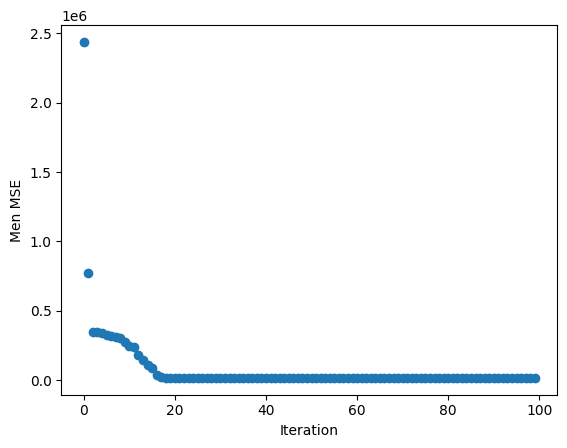

In [329]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()